In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [76]:
import numpy as np
import pandas as pd
import datetime as dt
from datetime import datetime

# Reflect Tables into SQLAlchemy ORM

In [48]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func
from sqlalchemy import inspect

In [17]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite", echo=False)
engine

Engine(sqlite:///Resources/hawaii.sqlite)

In [18]:
# reflect an existing database into a new model
Base = automap_base()

In [19]:
# reflect the tables
Base.prepare(engine, reflect = True)

In [31]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [33]:
# Save references to each table
Measure = Base.classes.measurement
Station = Base.classes.station

In [25]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [52]:
# get column names using inspector
inspector = inspect(engine)
inspector.get_table_names()

columns = inspector.get_columns('measurement')
for column in columns:
    print(column["name"], column["type"])

id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT


In [86]:
# Find the most recent date in the data set.
query = session.query(Measure.date).order_by(Measure.date.desc()).first()
query

('2017-08-23')

In [93]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 
recent_date = dt.date(2017, 8, 23)

# Calculate the date one year from the last date in data set.
year_ago = recent_date - dt.timedelta(days=365)

# Perform a query to retrieve the data and precipitation scores
result = session.query(Measure.date, Measure.prcp).\
    filter(Measure.date <= recent_date).\
    filter(Measure.date>= year_ago).all()

result

[('2016-08-23', 0.0),
 ('2016-08-24', 0.08),
 ('2016-08-25', 0.08),
 ('2016-08-26', 0.0),
 ('2016-08-27', 0.0),
 ('2016-08-28', 0.01),
 ('2016-08-29', 0.0),
 ('2016-08-30', 0.0),
 ('2016-08-31', 0.13),
 ('2016-09-01', 0.0),
 ('2016-09-02', 0.0),
 ('2016-09-03', 0.0),
 ('2016-09-04', 0.03),
 ('2016-09-05', None),
 ('2016-09-06', None),
 ('2016-09-07', 0.05),
 ('2016-09-08', 0.0),
 ('2016-09-09', 0.03),
 ('2016-09-10', 0.0),
 ('2016-09-11', 0.05),
 ('2016-09-12', 0.0),
 ('2016-09-13', 0.02),
 ('2016-09-14', 1.32),
 ('2016-09-15', 0.42),
 ('2016-09-16', 0.06),
 ('2016-09-17', 0.05),
 ('2016-09-18', 0.0),
 ('2016-09-19', 0.0),
 ('2016-09-20', 0.0),
 ('2016-09-21', 0.0),
 ('2016-09-22', 0.02),
 ('2016-09-23', 0.0),
 ('2016-09-24', 0.0),
 ('2016-09-25', 0.0),
 ('2016-09-26', 0.06),
 ('2016-09-27', 0.02),
 ('2016-09-28', 0.0),
 ('2016-09-29', 0.0),
 ('2016-09-30', 0.0),
 ('2016-10-01', 0.0),
 ('2016-10-02', 0.0),
 ('2016-10-03', 0.0),
 ('2016-10-04', 0.0),
 ('2016-10-05', 0.0),
 ('2016-10-06'

In [100]:
# Save the query results as a Pandas DataFrame and set the index to the date column
precip = pd.DataFrame(result, columns=['Date', 'Precipitation Score'])
precip.set_index('Date', inplace=True)
# Sort the dataframe by date
precip.sort_index(ascending=False)

,Precipitation Score
Date,
2017-08-23,0.45
2017-08-23,0.08
2017-08-23,0.00
2017-08-23,0.00
2017-08-22,0.00
...,...
2016-08-23,0.15
2016-08-23,0.70
2016-08-23,0.02


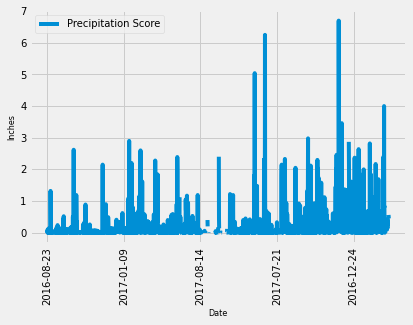

In [208]:
# Use Pandas Plotting with Matplotlib to plot the data
ax = precip.plot(rot=90, fontsize=10)
plt.legend(prop={'size': 10})
ax.set_xlabel('Date', fontsize=8)
ax.set_ylabel('Inches', fontsize=8)
plt.savefig('Images/Precipitation.png')

In [113]:
# Use Pandas to calcualte the summary statistics for the precipitation data
summary = precip.describe()
summary

,Precipitation Score
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [114]:
# Get column names
columns = inspector.get_columns('station')
for column in columns:
    print(column["name"], column["type"])

id INTEGER
station TEXT
name TEXT
latitude FLOAT
longitude FLOAT
elevation FLOAT


In [121]:
# Design a query to calculate the total number stations in the dataset
station_number = session.query(func.count(Station.station)).all()
station_number

[(9)]

In [132]:
# Design a query to find the most active stations (i.e. what stations have the most rows?)
# List the stations and the counts in descending order.
active_stations = session.query(Measure.station, func.count(Measure.station)).group_by(Measure.station).order_by(func.count(Measure.station).desc()).all()
active_stations

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [140]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
calculation = session.query(func.min(Measure.tobs), func.max(Measure.tobs), func.avg(Measure.tobs)).filter(Measure.station == 'USC00519281').all()
calculation
print(f"The most active station is: {active_stations[0][0]},\nIts minimum temperature was: {calculation[0][0]}\nMaximum\
 temperature was: {calculation[0][1]}\nAverage temperature was: {round(calculation[0][2], 2)}")

The most active station is: USC00519281,
Its minimum temperature was: 54.0
Maximum temperature was: 85.0
Average temperature was: 71.66


In [190]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station
temp_obs = session.query(Measure.tobs).filter(Measure.station == 'USC00519281').filter(Measure.date <= recent_date).\
    filter(Measure.date>= year_ago).all()
temp_df = pd.DataFrame(temp_obs, columns = ['tobs'])
temp_df.sort_values(by=['tobs'], ascending=False)

,tobs
345,83.0
344,82.0
340,82.0
334,82.0
313,81.0
...,...
164,60.0
250,60.0
170,59.0
169,59.0


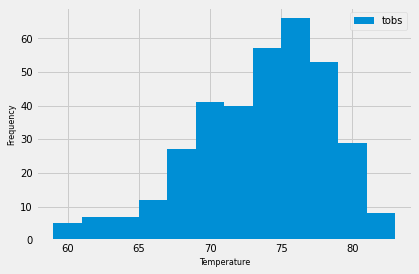

In [197]:
# plot the results as a histogram
fig, axes = plt.subplots()
temp_df.hist(xlabelsize=10, ylabelsize=10, bins=12, ax=axes)
plt.title("")
axes.set_xlabel('Temperature', fontsize=8)
axes.set_ylabel('Frequency', fontsize=8)
axes.legend(labels= ['tobs'], loc='upper right', fontsize=10)
plt.savefig('Images/Station_temp.png')

# Close session

In [209]:
# Close Session
session.close()